In [1]:
import pandas as pd
import numpy as np

In [17]:
wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)

In [18]:
wash_data[16] = 1
brush_data[16] = 2
walk_data[16] = 3
eat_data[16] = 4
sit_data[16] = 5
stand_data[16] = 6

In [19]:
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()


#wash_arr.shape, brush_arr.shape, walk_arr.shape, eat_arr.shape

In [20]:
tot_data = np.concatenate((wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data.shape

(4089, 17)

In [21]:
train_x = tot_data[:,:-1]

In [22]:
train_y = tot_data[:,-1:]

# none standard scaler

스케일링도 계산이기 때문에 스케일링을 안했을 때, 정확도가 높게 나온다면 스케일링 진행 x

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

In [26]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0,    0],
       [  15, 1591,    0,    4,    0,    3],
       [   1,    0,  142,    0,    0,    0],
       [   2,    7,    0,  201,    0,    0],
       [   0,    0,    0,    0,   38,   20],
       [   0,    1,    0,    0,    0,   82]], dtype=int64)

sit, stand 를 합쳐서 진행하는 것도 좋을 것 같음

In [30]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[527] = { 0 };
    double decisions[15] = { 0 };
    int votes[6] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 1.75  , -0.31  , -1.06  , 0.14  , -0.34  , -0.75  , 0.07  , 0.18  , -0.21  , -0.37 );
        kernels[1] = compute_kernel(x,   10.6  , -4.07  , 6.46  , 5.22  , 5.32  , 1.07  , 3.62  , 0.05  , 0.17  , -13.37  , 0.01  , 0.04  , -0.69  , 0.15  , 0.25  , -1.28 );
        kernels[2] = compute_kernel(x,   11.53  , 6.69  , 4.21  , 6.16  , 0.95  , 4.63  , 5.2  , 1.4  , 22.27  , 1.16  , 0.32 

커널의 개수 약 526개 -> m0 에 올리기에 부담이 감 -> 모델을 줄이거나, feature 줄이거나

## stand, sit -> 합침

In [ ]:
wash_data[16] = 1
brush_data[16] = 2
walk_data[16] = 3
eat_data[16] = 4
sit_data[16] = 5
stand_data[16] = 6

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(train_x)

In [86]:
scaled_train_x_drop = scaled_train_x[:,:-3]

# remove Gy

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [88]:
from sklearn.svm import SVC

In [91]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_train_x_drop, train_y.flatten(), cv=skf)

In [92]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    0,    3],
       [  13, 1600,    0],
       [   1,    0,  142]], dtype=int64)

In [93]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01).fit(scaled_train_x_drop, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[13], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 13);
    for (uint16_t i = 0; i < 13; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[264] = { 0 };
    double decisions[3] = { 0 };
    int votes[3] = { 0 };
        kernels[0] = compute_kernel(x,   -0.524311365  , 1.152212165  , -1.226619249  , 1.446970777  , -1.228957613  , -1.266127064  , -0.208299194  , 0.627174959  , 0.076257688  , -0.023350921  , 0.285264677  , -0.91010728  , -0.171858412 );
        kernels[1] = compute_kernel(x,   1.625846034  , 1.283414383  , -0.307349893  , 1.211376427  , -1.330492621  , 1.221291665  , 3.572697948  , 0.865196082  , 3.856567458  , 0.169956197  , 1.759377157  , 1.943000682  , 0.062527101

# SVM

In [62]:
from micromlgen import port

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [65]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)

In [66]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_train_x, train_y.flatten(), cv=skf)

In [67]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1981,    1,    0],
       [  13, 1600,    0],
       [   1,    0,  142]], dtype=int64)

In [69]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

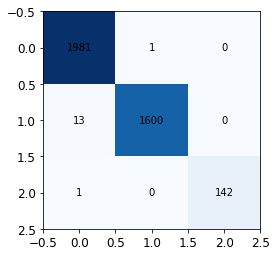

In [70]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
plt.show()

In [64]:
print(port(svm_clf))

AssertionError: 

In [74]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.001).fit(scaled_train_x, train_y.flatten())

In [75]:
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.001 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[770] = { 0 };
    double decisions[3] = { 0 };
    int votes[3] = { 0 };
        kernels[0] = compute_kernel(x,   -0.524311365  , 1.152212165  , -1.226619249  , 1.446970777  , -1.228957613  , -1.266127064  , -0.208299194  , 0.627174959  , 0.076257688  , -0.023350921  , 0.285264677  , -0.91010728  , -0.171858412  , -0.259219337  , -1.343480832  , -0.801066763 );
        kernels[1] = compute_kernel(x,   1.625846034  , 1.283414383  , -0.307349893  , 1.211376427  , -1.330492621  , 1.221291665  , 3.572697948  , 0.865196082  , 3.856567458  , 0.16995

# Model (kernel = 274

In [76]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01).fit(scaled_train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[274] = { 0 };
    double decisions[3] = { 0 };
    int votes[3] = { 0 };
        kernels[0] = compute_kernel(x,   -0.524311365  , 1.152212165  , -1.226619249  , 1.446970777  , -1.228957613  , -1.266127064  , -0.208299194  , 0.627174959  , 0.076257688  , -0.023350921  , 0.285264677  , -0.91010728  , -0.171858412  , -0.259219337  , -1.343480832  , -0.801066763 );
        kernels[1] = compute_kernel(x,   1.625846034  , 1.283414383  , -0.307349893  , 1.211376427  , -1.330492621  , 1.221291665  , 3.572697948  , 0.865196082  , 3.856567458  , 0.169956

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_train_x, train_y.flatten(), cv=skf)

In [77]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

In [78]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_train_x, train_y.flatten(), cv=skf)

In [79]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1976,    1,    5],
       [  14, 1599,    0],
       [   1,    0,  142]], dtype=int64)